<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/Binding_curve_simulation_1_to_1_mdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

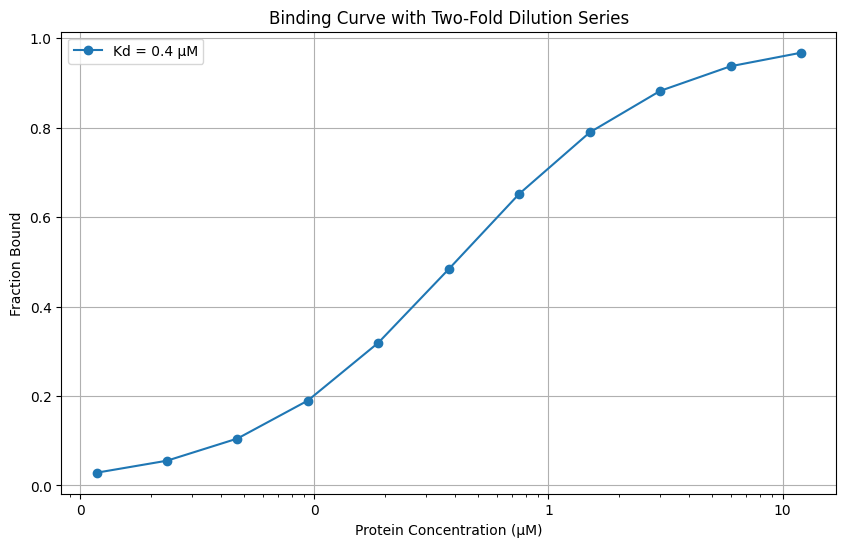

In [30]:

"""
This Python script simulates a 1:1 binding curve for a protein-ligand
interaction using a two-fold dilution series, starting at 20 µM.

The script includes:
1. Function: calculate_fraction_bound(p, kd)
   - Formula: Fraction Bound = [Protein] / (Kd + [Protein])
   - Inputs: Protein concentration (p) in µM, Dissociation constant (Kd) in µM

2. Two-fold dilution series:
   - Starting concentration: 12 µM
   - Number of steps: 12
   - Protein concentrations: [12, 6, 3, 1.5, ...] µM

3. Parameters:
   - Ligand concentration: 50 nM (0.05 µM)
   - Dissociation constant (Kd): 400 nM (0.4 µM)

4. Calculation of fraction bound for each protein concentration.

5. Plotting the binding curve:
   - X-axis: Protein concentration (µM) on a logarithmic scale
   - Y-axis: Fraction Bound
   - Title: Binding Curve with Two-Fold Dilution Series
   - Non-scientific notation for x-axis labels

This script was developed with the assistance of Microsoft Copilot, an AI
companion created by Microsoft.
"""


import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate fraction bound for a 1:1 binding model
def calculate_fraction_bound(p, l, kd):
    return (p) / (kd + p)

# Install the required package
try:
    import pybindingcurve as pbc
except ImportError:
    subprocess.check_call([os.sys.executable, "-m", "pip", "install", "pybindingcurve"])
    import pybindingcurve as pbc

# Define system parameters
start_concentration = 12  # Starting concentration in µM
dilution_steps = 11  # Number of two-fold dilution steps
protein_concentration = np.array([start_concentration / (2**i) for i in range(dilution_steps)])  # Two-fold dilution series
ligand_concentration = 0.05  # Ligand concentration in µM
kd = 0.4  # Kd for protein-ligand interaction in µM

# Calculate fraction bound
fraction_bound = calculate_fraction_bound(protein_concentration, ligand_concentration, kd)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.xlabel('Protein Concentration (µM)')
plt.ylabel('Fraction Bound')
plt.title('Binding Curve with Two-Fold Dilution Series')

# Set the x-axis to use non-scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Add the binding curve data
plt.plot(protein_concentration, fraction_bound, marker='o', linestyle='-', label='Kd = {} µM'.format(kd))

plt.legend()
plt.grid(True)
plt.show()
